<a href="https://colab.research.google.com/github/merazAfridi/Forest_Drone_ImgageSegmentation/blob/main/Updated_ForestImgageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

gazimerazmehedi_forestsegmentationdrone_path = kagglehub.dataset_download('gazimerazmehedi/forestsegmentationdrone')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/meta_data.csv
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/626208_sat_04.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/15573_sat_26.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/749523_sat_70.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/830444_sat_35.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/340898_sat_47.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/563092_sat_47.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/119079_sat_71.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/296279_sat_35.jpg
/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images/134465_sat_34.jpg
/kaggle/input/forestsegmentationdrone/Fore

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 747.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but y

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input, BatchNormalization, Activation
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence

2024-11-01 21:21:56.166748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730496116.189884      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730496116.197295      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


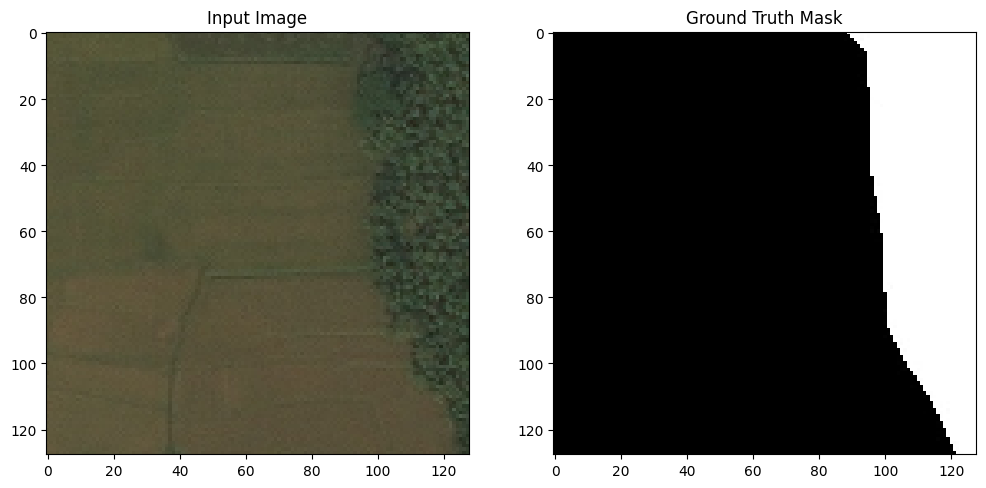

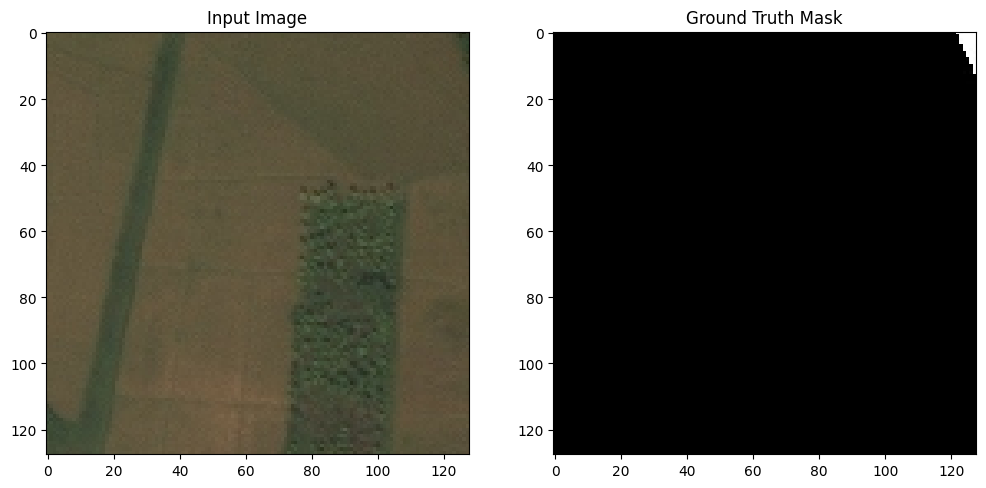

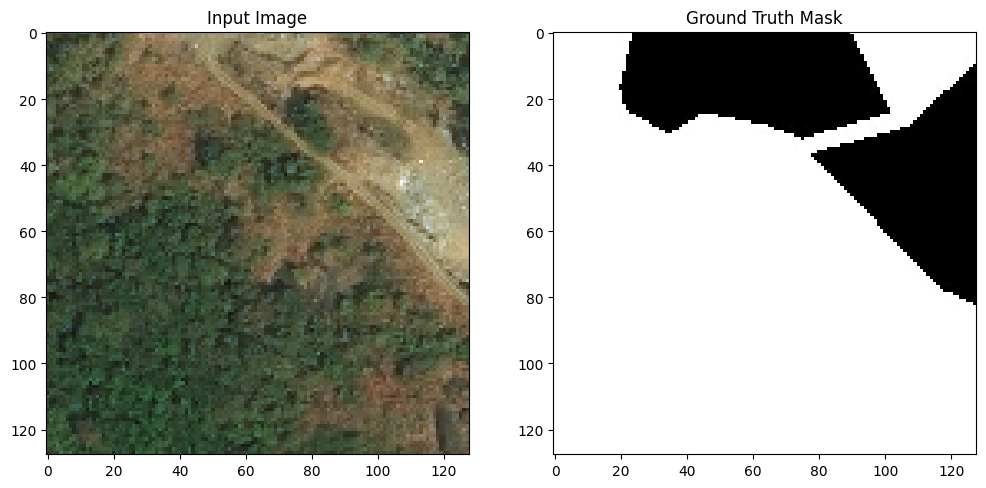

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image size
IMG_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS = 10

# Directories for images and masks
image_dir = '/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/images'
mask_dir = '/kaggle/input/forestsegmentationdrone/Forest Segmented/Forest Segmented/masks'

# Load filenames
image_filenames = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
mask_filenames = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.jpg')])

# List images and masks
image_filenames = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir)])
mask_filenames = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir)])

# Function to load and resize images and masks to 128x128
def load_and_resize(image_path, target_size=(128, 128, 3)):
    img = load_img(image_path, target_size=target_size)
    return img_to_array(img)

# load and normalize images and masks to [0, 1] range
images = np.array([load_and_resize(img) / 255.0 for img in image_filenames])
masks = np.array([load_and_resize(mask, target_size=(128, 128, 3)) / 255.0 for mask in mask_filenames])

#Display
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(images[i])
    plt.title('Input Image')
    plt.subplot(1, 2, 2)
    plt.imshow(masks[i].squeeze(), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.show()


In [ ]:
# Split into training+validation (80%) and testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images, masks, test_size=0.2, random_state=42)

# Further split training+validation into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)



# Print
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

Training samples: 3268
Validation samples: 818
Test samples: 1022


In [ ]:
# number of samples
print(f"Train Images Count: {len(X_train)}")
print(f"Train Masks Count: {len(y_train)}")
print(f"Validation Images Count: {len(X_val)}")
print(f"Validation Masks Count: {len(y_val)}")
print(f"Test Images Count: {len(X_test)}")
print(f"Test Masks Count: {len(y_test)}")


Train Images Count: 3268
Train Masks Count: 3268
Validation Images Count: 818
Validation Masks Count: 818
Test Images Count: 1022
Test Masks Count: 1022


In [ ]:
# Function to convert data into a Tf dataset
def create_tf_dataset(images, masks, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((images, masks))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch
    return dataset

train_dataset = create_tf_dataset(X_train, y_train, BATCH_SIZE)
val_dataset = create_tf_dataset(X_val, y_val, BATCH_SIZE)
test_dataset = create_tf_dataset(X_test, y_test, BATCH_SIZE)

In [ ]:
# Print
print(f"Train Images Shape: {X_train.shape}")
print(f"Train Masks Shape: {y_train.shape}")
print(f"Validation Images Shape: {X_val.shape}")
print(f"Validation Masks Shape: {y_val.shape}")
print(f"Test Images Shape: {X_test.shape}")
print(f"Test Masks Shape: {y_test.shape}")

Train Images Shape: (3268, 128, 128, 3)
Train Masks Shape: (3268, 128, 128, 3)
Validation Images Shape: (818, 128, 128, 3)
Validation Masks Shape: (818, 128, 128, 3)
Test Images Shape: (1022, 128, 128, 3)
Test Masks Shape: (1022, 128, 128, 3)


In [ ]:
y_train = y_train.astype('bool')
print(y_train.dtype)

bool


In [ ]:
from tensorflow.keras import backend as K


def dice_coef(a, b):
    hi = a
    pred = b
    hi = keras.layers.Flatten()(hi)
    pred = keras.layers.Flatten()(pred)
    upper_part = 2 * tf.keras.backend.sum((hi * pred))
    lower_part = tf.keras.backend.sum(hi + pred)
    dice = upper_part / lower_part
    return dice

def jaccard_index(a, b):
    hi = a
    pred = b
    hi = keras.layers.Flatten()(hi)
    pred = keras.layers.Flatten()(pred)
    numerator = tf.keras.backend.sum(hi * pred)
    denominator = tf.keras.backend.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou




In [ ]:
from keras import backend as K
from keras.layers import concatenate, Conv2DTranspose, Activation
from keras.layers import BatchNormalization


from keras.layers import Conv2D, Input, AvgPool2D
from keras.models import Model

dropout_rate = 0.5

#input_shape = (128, 128, 3)
#n_labels    = 3

def conv_batchnorm_relu_block(input_tensor, nb_filter, kernel_size=3):

    x = Conv2D(nb_filter, (kernel_size, kernel_size), padding='same')(input_tensor)
    x = BatchNormalization(axis=2)(x)
    x = Activation('relu')(x)

    return x


def model_build_func(input_shape, n_labels, using_deep_supervision=False):

    nb_filter = [32,64,128,256,512]

    # Set image data format to channels first
    global bn_axis

    K.set_image_data_format("channels_last")
    bn_axis = -1
    inputs = Input(shape=input_shape, name='input_image')

    conv1_1 = conv_batchnorm_relu_block(inputs, nb_filter=nb_filter[0])
    pool1 = AvgPool2D((2, 2), strides=(2, 2), name='pool1')(conv1_1)

    conv2_1 = conv_batchnorm_relu_block(pool1, nb_filter=nb_filter[1])
    pool2 = AvgPool2D((2, 2), strides=(2, 2), name='pool2')(conv2_1)

    up1_2 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up12', padding='same')(conv2_1)
    conv1_2 = concatenate([up1_2, conv1_1], name='merge12', axis=bn_axis)
    conv1_2 = conv_batchnorm_relu_block(conv1_2,  nb_filter=nb_filter[0])

    conv3_1 = conv_batchnorm_relu_block(pool2, nb_filter=nb_filter[2])
    pool3 = AvgPool2D((2, 2), strides=(2, 2), name='pool3')(conv3_1)

    up2_2 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up22', padding='same')(conv3_1)
    conv2_2 = concatenate([up2_2, conv2_1], name='merge22', axis=bn_axis)
    conv2_2 = conv_batchnorm_relu_block(conv2_2, nb_filter=nb_filter[1])

    up1_3 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up13', padding='same')(conv2_2)
    conv1_3 = concatenate([up1_3, conv1_1, conv1_2], name='merge13', axis=bn_axis)
    conv1_3 = conv_batchnorm_relu_block(conv1_3, nb_filter=nb_filter[0])

    conv4_1 = conv_batchnorm_relu_block(pool3, nb_filter=nb_filter[3])
    pool4 = AvgPool2D((2, 2), strides=(2, 2), name='pool4')(conv4_1)

    up3_2 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up32', padding='same')(conv4_1)
    conv3_2 = concatenate([up3_2, conv3_1], name='merge32', axis=bn_axis)
    conv3_2 = conv_batchnorm_relu_block(conv3_2, nb_filter=nb_filter[2])

    up2_3 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up23', padding='same')(conv3_2)
    conv2_3 = concatenate([up2_3, conv2_1, conv2_2], name='merge23', axis=bn_axis)
    conv2_3 = conv_batchnorm_relu_block(conv2_3, nb_filter=nb_filter[1])

    up1_4 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up14', padding='same')(conv2_3)
    conv1_4 = concatenate([up1_4, conv1_1, conv1_2, conv1_3], name='merge14', axis=bn_axis)
    conv1_4 = conv_batchnorm_relu_block(conv1_4, nb_filter=nb_filter[0])

    conv5_1 = conv_batchnorm_relu_block(pool4, nb_filter=nb_filter[4])

    up4_2 = Conv2DTranspose(nb_filter[3], (2, 2), strides=(2, 2), name='up42', padding='same')(conv5_1)
    conv4_2 = concatenate([up4_2, conv4_1], name='merge42', axis=bn_axis)
    conv4_2 = conv_batchnorm_relu_block(conv4_2, nb_filter=nb_filter[3])

    up3_3 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up33', padding='same')(conv4_2)
    conv3_3 = concatenate([up3_3, conv3_1, conv3_2], name='merge33', axis=bn_axis)
    conv3_3 = conv_batchnorm_relu_block(conv3_3, nb_filter=nb_filter[2])

    up2_4 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up24', padding='same')(conv3_3)
    conv2_4 = concatenate([up2_4, conv2_1, conv2_2, conv2_3], name='merge24', axis=bn_axis)
    conv2_4 = conv_batchnorm_relu_block(conv2_4, nb_filter=nb_filter[1])

    up1_5 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up15', padding='same')(conv2_4)
    conv1_5 = concatenate([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], name='merge15', axis=bn_axis)
    conv1_5 = conv_batchnorm_relu_block(conv1_5, nb_filter=nb_filter[0])

    nestnet_output_1 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_1',padding='same')(conv1_2)
    nestnet_output_2 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_2', padding='same' )(conv1_3)
    nestnet_output_3 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_3', padding='same')(conv1_4)
    nestnet_output_4 = Conv2D(n_labels, (1, 1), activation='sigmoid', name='output_4', padding='same')(conv1_5)

    if using_deep_supervision==True:
        model = Model(inputs=inputs, outputs=[nestnet_output_1,
                                            nestnet_output_2,
                                            nestnet_output_3,
                                            nestnet_output_4])
    else:
        model = Model(inputs=inputs, outputs=nestnet_output_4)

    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.054,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

    opt = keras.optimizers.Adam(learning_rate=3e-4)

    #model.compile(optimizer='adam', loss='binary_crossentropy')
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', dice_coef, jaccard_index])
    #dice_coef, jaccard_index

    return model

In [ ]:
from tensorflow import keras
input_shape = (128,128,3)
n_labels = 3
model = model_build_func(input_shape, n_labels)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 128, 128,  │        896 │ input_image[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ activation_15[0]… │
│ (AveragePooling2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 64, 64,    │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 32, 32,    │          0 │ activation_16[0]… │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 32, 32,    │     73,856 │ pool2[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool3               │ (None, 16, 16,    │          0 │ activation_18[0]… │
│ (AveragePooling2D)  │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 16, 16,    │    295,168 │ pool3[0][0]       │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │         64 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool4               │ (None, 8, 8, 256) │          0 │ activation_21[0]

 Total params: 4,869,699 (18.58 MB)

 Trainable params: 4,867,635 (18.57 MB)

 Non-trainable params: 2,064 (8.06 KB)

In [ ]:
print(X_train.dtype)
print(y_train.dtype)

print(type(X_train))
print(type(y_train))

X_train = X_train.astype('uint8')
y_train = y_train.astype('float64')

print(X_train.dtype)
print(y_train.dtype)

float32
bool
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
uint8
float64


In [ ]:
print(X_train.shape)
print(y_train.shape)

(3268, 128, 128, 3)
(3268, 128, 128, 3)


In [ ]:
# Train the model and store the history
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,  # Use val_dataset for validation
    steps_per_epoch=len(X_train) // BATCH_SIZE,  # Calculate steps per epoch
    validation_steps=len(X_val) // BATCH_SIZE    # Calculate validation steps
)


Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.2705 - dice_coef: 0.6190 - jaccard_index: 0.4500 - loss: 0.6722 - val_accuracy: 0.7856 - val_dice_coef: 0.5579 - val_jaccard_index: 0.3877 - val_loss: 0.6770
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.9745 - dice_coef: 0.2971 - jaccard_index: 0.2109 - loss: 0.6804 - val_accuracy: 0.7838 - val_dice_coef: 0.3111 - val_jaccard_index: 0.2258 - val_loss: 0.6620
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.3361 - dice_coef: 0.6219 - jaccard_index: 0.4526 - loss: 0.6624 - val_accuracy: 0.0347 - val_dice_coef: 0.5176 - val_jaccard_index: 0.3497 - val_loss: 0.7032
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.9820 - dice_coef: 0.2974 - jaccard_index: 0.2112 - loss: 0.6797 - val_accuracy: 0.0168 - val_dice_coef: 0.2868 - val_jaccard_index: 0.2010 - val_loss: 0.7309
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.3944 - dice_coef: 0.6216 - jacc

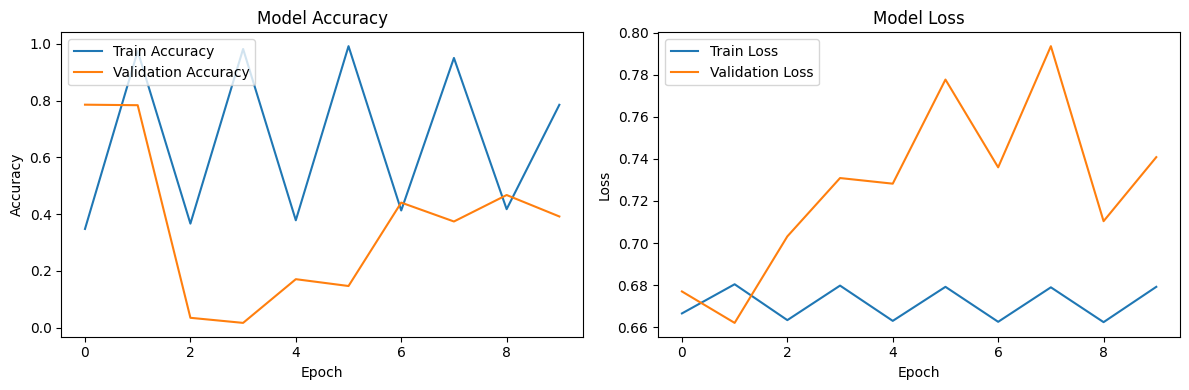

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

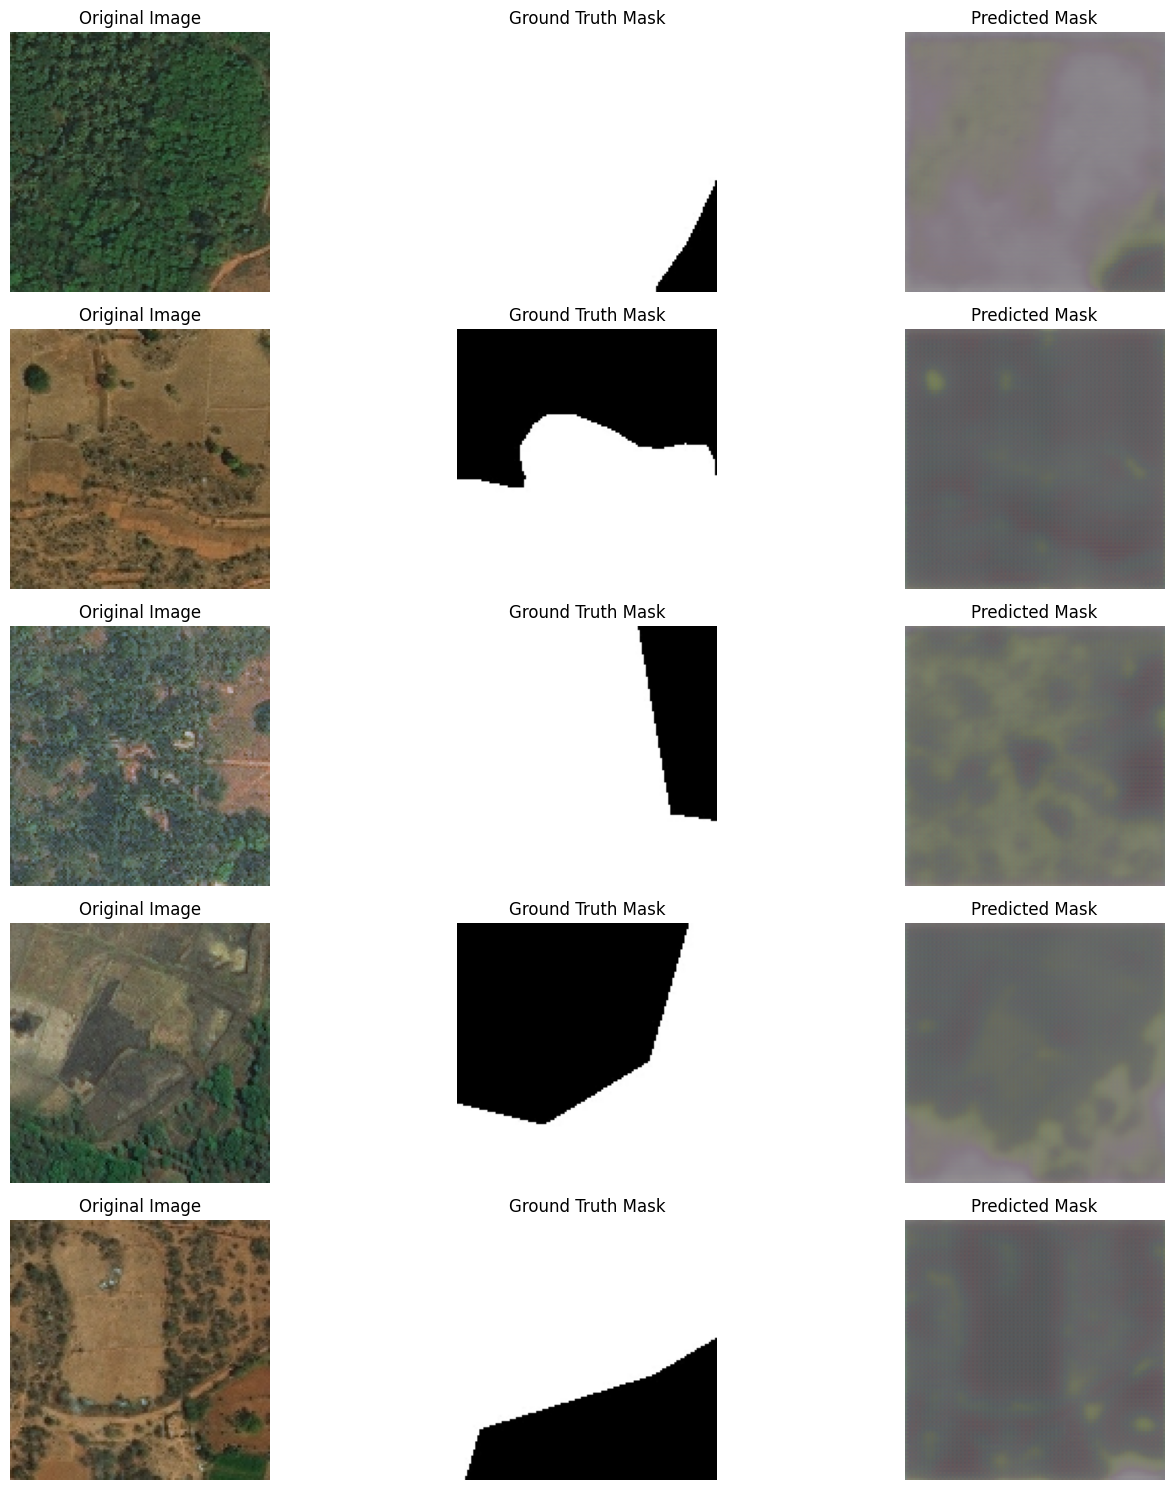

In [ ]:
# y_test to NumPy arrays for validation masks
validation_masks = [mask for mask in y_test]

# Visualization
def visualize_predictions(X_test, y_test, predictions, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        # Plot original image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(X_test[i])
        plt.title("Original Image")
        plt.axis("off")

        # Plot ground truth mask
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(y_test[i].squeeze(), cmap='gray')
        plt.title("Ground Truth Mask")
        plt.axis("off")

        # Plot predicted mask
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

visualize_predictions(X_test, y_test, predictions)


In [ ]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score
import numpy as np

# y_test to NumPy arrays for validation masks
validation_masks = np.array([mask for mask in y_test])

# Flatten
y_true = validation_masks.flatten()
y_pred = (predictions > 0.4).astype(np.uint8).flatten()

#y_true to binary using a threshold
y_true_binary = (y_true > 0.4).astype(np.uint8)

# Print
print(f'y_true shape: {y_true_binary.shape}, type: {y_true_binary.dtype}')
print(f'y_pred shape: {y_pred.shape}, type: {y_pred.dtype}')

#evaluation metrics
accuracy = accuracy_score(y_true_binary, y_pred)
jaccard = jaccard_score(y_true_binary, y_pred, average='weighted')  # For multiclass
dice = 2 * np.sum(y_true_binary * y_pred) / (np.sum(y_true_binary) + np.sum(y_pred))  # Dice Coefficient

#Output
print(f'Accuracy: {accuracy:.4f}')
print(f'Jaccard Index (IoU): {jaccard:.4f}')
print(f'Dice Coefficient: {dice:.4f}')


y_true shape: (50233344,), type: uint8
y_pred shape: (50233344,), type: uint8
Accuracy: 0.6518
Jaccard Index (IoU): 0.4891
Dice Coefficient: 0.7008


In [ ]:
# Save the model
model.save('/kaggle/working/forest_segmentation_unet.keras')
